<a href="https://colab.research.google.com/github/Anuj-1996/Ship_CO2_Emission/blob/main/EDA_of_EU_CO2_emissions_from_maritime_transport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Libraries

In [1]:
#pip install dtale

In [2]:
pip install movecolumn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **EDA of CO2 emissions from maritime transport (Europe)**

For this EDA, the dataset has downloaded from the EU MRV website : https://mrv.emsa.europa.eu/#public/emission-report.

The EU MRV (Monitoring, Reporting, Verification) Regulation entered into force on 1 July 2015, and requires ship owners and operators to annually monitor, report and verify CO2 emissions for vessels larger than 5000 gross tonnage (GT) calling at any EU and EFTA (Norway and Iceland) port.

# Preliminary Dataset

Year wise dataset available on the EU MRV website from 2018 to 2021 in the Excel format. The year-wise dataset downloaded on local drive and merge on the Excel. Also, deleted unnecessory/empty column from the dataset.

In [3]:
#Mounting Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
#importing libraries
import pandas as pd
import numpy as np

#Chi-Suquare test
import scipy.stats as stats

#visualization Libraries: Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Seaborn
import seaborn as sns
sns.set()

#plotly go and px
import plotly
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'colab'

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# import plotly.offline as pyo
# # Set notebook mode to work in offline
# pyo.init_notebook_mode()

#uncomment this only exporting to github. Uncomment this, then run and save to github.
# import plotly.io as pio

# pio.renderers

# pio.renderers.default = "svg"

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# import klib
import movecolumn as mc

In [5]:
# Importing Excel from the drive and converting excel to pandas df
dataset = pd.read_excel('/content/drive/MyDrive/EU_CO2_Emission_Data/2018_2021_EU_ship_emission_dataset.xlsx', parse_dates=['Reporting Period'])

In [144]:
#creating copy of main dataset
df = dataset.copy()

In [145]:
# remove spaces in columns name
df.columns = df.columns.str.replace(' ','_')


In [146]:
# Displaying 1st five rows 
df.head()

,IMO_Number,Name,Ship_type,Reporting_Period,Technical_efficiency,[gCO₂/t·nm],Ice_Class,Verifier_Country,Total_fuel_consumption_[m_tonnes],Total_CO₂_emissions_[m_tonnes],Annual_Total_time_spent_at_sea_[hours],Annual_average_Fuel_consumption_per_distance_[kg_/_n_mile],Total_time_spent_at_sea_[hours],Total_time_spent_at_sea_through_ice_[hours]
0,6703343,EQUALITY,Other ship types,2021-01-01,EIV,57.84,NaN,Greece,373.50,1184.62,594.00,70.25,594.00,NaN
1,7037806,IONIAN STAR,Ro-pax ship,2021-01-01,EIV,19.40,NaN,France,1902.00,6097.81,1771.00,82.04,1771.00,NaN
2,7043843,TALOS,Ro-ro ship,2021-01-01,EIV,48.71,NaN,France,2081.79,6674.22,2992.36,57.72,2992.36,NaN
3,7128332,SEA WIND,Ro-pax ship,2021-01-01,EIV,9.29,IB,France,3299.89,10454.38,2737.00,93.47,2737.00,NaN
4,7226952,FJARDVAGEN,Ro-ro ship,2021-01-01,EIV,43.00,IA,France,1670.56,5355.81,2494.00,49.13,2494.00,NaN


# Dataset Overview

In [147]:
#shape of the Dataset
print('\n Shape:',df.shape)


 Shape: (48848, 14)


In [148]:
#Column or Feature in the dataset
print("\nNumber of features:", df.shape[1])
print("\nFeatures:")
print(df.columns.tolist())


Number of features: 14

Features:
['IMO_Number', 'Name', 'Ship_type', 'Reporting_Period', 'Technical_efficiency', '[gCO₂/t·nm]', 'Ice_Class', 'Verifier_Country', 'Total_fuel_consumption_[m_tonnes]', 'Total_CO₂_emissions_[m_tonnes]', 'Annual_Total_time_spent_at_sea_[hours]', 'Annual_average_Fuel_consumption_per_distance_[kg_/_n_mile]', 'Total_time_spent_at_sea_[hours]', 'Total_time_spent_at_sea_through_ice_[hours]']


In [149]:
#missing value
missing_value = df.isnull().sum().values.sum()

if missing_value == 0:
  print('\n Missing Values: No Missing Values')
else:
  print('\n Missing Values:', missing_value)


 Missing Values: 96172


In [150]:
#unique value

print("\n Unique values:")
print(df.nunique())



 Unique values:
IMO_Number                                                    18265
Name                                                          19451
Ship_type                                                        15
Reporting_Period                                                  4
Technical_efficiency                                              2
[gCO₂/t·nm]                                                    3061
Ice_Class                                                        11
Verifier_Country                                                 14
Total_fuel_consumption_[m_tonnes]                             44122
Total_CO₂_emissions_[m_tonnes]                                46571
Annual_Total_time_spent_at_sea_[hours]                        39073
Annual_average_Fuel_consumption_per_distance_[kg_/_n_mile]    18865
Total_time_spent_at_sea_[hours]                               39073
Total_time_spent_at_sea_through_ice_[hours]                      64
dtype: int64


In [151]:
#Data Type
print("\n Datatype:")
df.dtypes


 Datatype:


IMO_Number                                                             int64
Name                                                                  object
Ship_type                                                             object
Reporting_Period                                              datetime64[ns]
Technical_efficiency                                                  object
[gCO₂/t·nm]                                                          float64
Ice_Class                                                             object
Verifier_Country                                                      object
Total_fuel_consumption_[m_tonnes]                                    float64
Total_CO₂_emissions_[m_tonnes]                                       float64
Annual_Total_time_spent_at_sea_[hours]                               float64
Annual_average_Fuel_consumption_per_distance_[kg_/_n_mile]           float64
Total_time_spent_at_sea_[hours]                                      float64

In [152]:
#Describe
print("\n Statistics:")
df.describe().T


 Statistics:


,count,mean,std,min,25%,50%,75%,max
IMO_Number,48848.0,9.452908e+06,2.872266e+05,5383304.00,9307798.000,9451575.00,9.662370e+06,9.924912e+06
[gCO₂/t·nm],44898.0,1.331610e+01,2.406462e+02,0.00,4.500,7.09,1.448000e+01,4.622200e+04
Total_fuel_consumption_[m_tonnes],48848.0,3.580911e+03,4.535996e+03,0.00,1046.290,2060.89,4.083733e+03,9.846520e+04
Total_CO₂_emissions_[m_tonnes],48848.0,1.117477e+04,1.404531e+04,0.00,3283.740,6472.61,1.282207e+04,3.154785e+05
Annual_Total_time_spent_at_sea_[hours],48848.0,1.475896e+04,2.730116e+06,0.00,997.575,1964.86,3.567650e+03,6.034010e+08
Annual_average_Fuel_consumption_per_distance_[kg_/_n_mile],47172.0,1.474532e+02,3.409518e+03,2.79,77.490,99.63,1.425425e+02,7.192070e+05
Total_time_spent_at_sea_[hours],48848.0,1.475896e+04,2.730116e+06,0.00,997.575,1964.86,3.567650e+03,6.034010e+08
Total_time_spent_at_sea_through_ice_[hours],2843.0,3.219349e+00,4.642317e+01,0.00,0.000,0.00,0.000000e+00,1.166350e+03


In [153]:
#ship types
df.Ship_type.unique()

array(['Other ship types', 'Ro-pax ship', 'Ro-ro ship', 'Bulk carrier',
       'Passenger ship', 'General cargo ship', 'Chemical tanker',
       'Container ship', 'Refrigerated cargo carrier', 'Vehicle carrier',
       'Gas carrier', 'Container/ro-ro cargo ship', 'Oil tanker',
       'Combination carrier', 'LNG carrier'], dtype=object)

In [154]:
df.drop('Total_time_spent_at_sea_[hours]', axis= 1, inplace =True)
df.head(3)

,IMO_Number,Name,Ship_type,Reporting_Period,Technical_efficiency,[gCO₂/t·nm],Ice_Class,Verifier_Country,Total_fuel_consumption_[m_tonnes],Total_CO₂_emissions_[m_tonnes],Annual_Total_time_spent_at_sea_[hours],Annual_average_Fuel_consumption_per_distance_[kg_/_n_mile],Total_time_spent_at_sea_through_ice_[hours]
0,6703343,EQUALITY,Other ship types,2021-01-01,EIV,57.84,NaN,Greece,373.50,1184.62,594.00,70.25,NaN
1,7037806,IONIAN STAR,Ro-pax ship,2021-01-01,EIV,19.40,NaN,France,1902.00,6097.81,1771.00,82.04,NaN
2,7043843,TALOS,Ro-ro ship,2021-01-01,EIV,48.71,NaN,France,2081.79,6674.22,2992.36,57.72,NaN


In [155]:
df = df[df[['IMO_Number', 'Name', 'Ship_type', 'Reporting_Period', 'Technical_efficiency', '[gCO₂/t·nm]', 
            'Ice_Class', 'Verifier_Country', 'Total_fuel_consumption_[m_tonnes]', 'Total_CO₂_emissions_[m_tonnes]',
            'Annual_Total_time_spent_at_sea_[hours]','Annual_average_Fuel_consumption_per_distance_[kg_/_n_mile]', 
            'Total_time_spent_at_sea_through_ice_[hours]']].notnull().all(1)]

missing_value = df.isnull().sum().values.sum()

if missing_value == 0:
  print('\n Missing Values: No Missing Values')
else:
  print('\n Missing Values:', missing_value)


 Missing Values: No Missing Values


# 1. EDA

In [157]:
import dtale
import dtale.app as dtale_app

dtale_app.USE_COLAB = True

In [158]:
dtale.show(df)

https://eezvpx909as-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/2

In [159]:
# plt.figure(figsize=(10,8))
# corr = df.corr()[['Total_CO₂_emissions_[m_tonnes]']]
# sns.heatmap(corr, annot=True)

In [160]:
upper_tri = df.corr().where(np.triu(np.ones(df.corr().shape),k=1).astype(np.bool))
positive = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
negative = [column for column in upper_tri.columns if any(upper_tri[column] < -0.80)]
positive

['Total_CO₂_emissions_[m_tonnes]']

In [161]:
#Ship Type Value Count

s = df[~pd.isnull(df['Ship_type'])]['Ship_type']
chart = pd.value_counts(s).to_frame(name='data')
chart.index.name = 'labels'
chart = chart.reset_index().sort_values(['data', 'labels'], ascending=[False, True])
chart = chart[:100]
charts = [go.Bar(x=chart['labels'].values, y=chart['data'].values, name='Frequency')]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Ship type (Frequency)'},
    'xaxis': {'title': {'text': 'Ship_type'}},
    'yaxis': {'title': {'text': 'Frequency'}}
}))
figure.update_layout( autosize=False,height=600, width=1000)
figure.show(renderer="colab")

In [162]:
#@title Total fuel consumption (m tonnes)(mean) Categorized by Ship_type


chart = df.groupby('Ship_type')[['Total_fuel_consumption_[m_tonnes]']].agg(['count', 'mean'])
chart.columns = chart.columns.droplevel(0)
chart.columns = ["count", "data"]
chart.index.name = 'labels'
chart = chart.reset_index()
chart = chart[:100]
charts = [
	go.Bar(x=chart['labels'].values, y=chart['data'].values),
	go.Scatter(
		x=chart['labels'].values, y=chart['count'].values, yaxis='y2',
		name='Frequency', line={'shape': 'spline', 'smoothing': 0.3}, mode='lines'
	)
]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Total fuel consumption [m tonnes](mean) Categorized by Ship_type'},
    'xaxis': {'title': {'text': 'Ship_type'}},
    'yaxis': {'side': 'left', 'title': {'text': 'Total_fuel_consumption_[m_tonnes] (mean)'}},
    'yaxis2': {'overlaying': 'y', 'side': 'right', 'title': {'text': 'Frequency'}}
}))
figure.update_layout( autosize=False,height=600, width=1000)
figure.show(renderer="colab")

In [163]:
#@title Ice Class Value Counts


s = df[~pd.isnull(df['Ice_Class'])]['Ice_Class']
chart = pd.value_counts(s).to_frame(name='data')
chart.index.name = 'labels'
chart = chart.reset_index().sort_values(['data', 'labels'], ascending=[False, True])
chart = chart[:100]
charts = [go.Bar(x=chart['labels'].values, y=chart['data'].values, name='Frequency')]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Ice_Class Value Counts'},
    'xaxis': {'title': {'text': 'Ice_Class'}},
    'yaxis': {'title': {'text': 'Frequency'}}
    
}  ))
figure.update_layout( autosize=False,height=600, width=1000)
figure.show(renderer="colab")


* PC 1	Year-round operation in all polar waters
* PC 2	Year-round operation in moderate multi-year ice conditions
* PC 3	Year-round operation in second-year ice, which may include multi-year ice inclusions
* PC 4	Year-round operation in thick first-year ice, which may include old ice inclusions
* PC 5	Year-round operation in medium first-year ice, which may include old ice inclusions
* PC 6	Summer/autumn operation in medium first-year ice, which may include old ice inclusions
* PC 7	Summer/autumn operation in thin first-year ice, which may include old ice inclusions

In [164]:
#@title Total CO₂ emissions [m tonnes](mean) Categorized by Ice Class

chart = df.groupby('Ice_Class')[['Total_CO₂_emissions_[m_tonnes]']].agg(['count', 'mean'])
chart.columns = chart.columns.droplevel(0)
chart.columns = ["count", "data"]
chart.index.name = 'labels'
chart = chart.reset_index()
chart = chart[:100]
charts = [
	go.Bar(x=chart['labels'].values, y=chart['data'].values),
	go.Scatter(
		x=chart['labels'].values, y=chart['count'].values, yaxis='y2',
		name='Frequency', line={'shape': 'spline', 'smoothing': 0.3}, mode='lines'
	)
]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Total CO₂ emissions [m tonnes](mean) Categorized by Ice Class'},
    'xaxis': {'title': {'text': 'Ice_Class'}},
    'yaxis': {'side': 'left', 'title': {'text': 'Total CO₂ emissions [m tonnes] (mean)'}},
    'yaxis2': {'overlaying': 'y', 'side': 'right', 'title': {'text': 'Frequency'}}
}))
figure.update_layout( autosize=False,height=600, width=1000)
figure.show(renderer="colab")


In [165]:
#@title Total CO₂ emissions (m tonnes)(mean) Categorized by Ship type


if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart = df.groupby('Ship_type')[['Total_CO₂_emissions_[m_tonnes]']].agg(['count', 'mean'])
chart.columns = chart.columns.droplevel(0)
chart.columns = ["count", "data"]
chart.index.name = 'labels'
chart = chart.reset_index()
chart = chart[:100]
charts = [
	go.Bar(x=chart['labels'].values, y=chart['data'].values),
	go.Scatter(
		x=chart['labels'].values, y=chart['count'].values, yaxis='y2',
		name='Frequency', line={'shape': 'spline', 'smoothing': 0.3}, mode='lines'
	)
]
figure= go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Total CO₂ emissions [m tonnes](mean) Categorized by Ship type'},
    'xaxis': {'title': {'text': 'Ship_type'}},
    'yaxis': {'side': 'left', 'title': {'text': 'Total_CO₂_emissions_[m_tonnes] (mean)'}},
    'yaxis2': {'overlaying': 'y', 'side': 'right', 'title': {'text': 'Frequency'}}
}))
figure.update_layout( autosize=False,height=600, width=1000)
figure.show(renderer="colab")



In [166]:
#@title Total CO₂ emissions [m tonnes] (mean) Categorized by Reporting Period

chart = df.groupby('Reporting_Period')[['Total_CO₂_emissions_[m_tonnes]']].agg(['count', 'mean'])
chart.columns = chart.columns.droplevel(0)
chart.columns = ["count", "data"]
chart.index.name = 'labels'
chart = chart.reset_index()
chart = chart[:100]
charts = [
	go.Bar(x=['2018', '2019', '2020','2021' ], y=chart['data'].values),
	go.Scatter(
		x=['2018', '2019', '2020','2021' ], y=chart['count'].values, yaxis='y2',
		name='Frequency', line={'shape': 'spline', 'smoothing': 0.3}, mode='lines'
	)
]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Total CO₂ emissions [m tonnes] (mean) Categorized by Reporting Period'},
    'xaxis': {'title': {'text': 'Reporting_Period'}},
    'yaxis': {'side': 'left', 'title': {'text': 'Total CO₂ emissions [m tonnes] (mean)'}},
    'yaxis2': {'overlaying': 'y', 'side': 'right', 'title': {'text': 'Frequency'}}
}))
figure.update_layout( autosize=False,height=600, width=1000)
figure.show(renderer="colab")


In [167]:
#@title Technical Efficiency in (gCO₂/t·nm)(mean) Categorized by Ship type

chart = df.groupby('Ship_type')[['[gCO₂/t·nm]']].agg(['count', 'mean'])
chart.columns = chart.columns.droplevel(0)
chart.columns = ["count", "data"]
chart.index.name = 'labels'
chart = chart.reset_index()
chart = chart[:100]
charts = [
	go.Bar(x=chart['labels'].values, y=chart['data'].values),
	go.Scatter(
		x=chart['labels'].values, y=chart['count'].values, yaxis='y2',
		name='Frequency', line={'shape': 'spline', 'smoothing': 0.3}, mode='lines'
	)
]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Technical Efficiency in (gCO₂/t·nm)(mean) Categorized by Ship type'},
    'xaxis': {'title': {'text': 'Ship_type'}},
    'yaxis': {'side': 'left', 'title': {'text': '[gCO₂/t·nm] (mean)'}},
    'yaxis2': {'overlaying': 'y', 'side': 'right', 'title': {'text': 'Frequency'}}
}))
figure.update_layout( autosize=False,height=600, width=1000)
figure.show(renderer="colab")


# Pivote Tables

In [168]:
#@title Pivote Table: Reporting Period and Ship Type w.r.t Count(Frequency)

df1 = pd.pivot_table(df, index=['Reporting_Period'], columns=['Ship_type'], values=['Name'], aggfunc='count')
df1.columns = df1.columns.droplevel(0)
df1 = df1.rename_axis(None, axis=1)
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df1 = df1.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df1 = df1.reset_index().drop('index', axis=1, errors='ignore')
df1.columns = [str(c) for c in df1.columns]  # update columns to strings in case they are numbers

df1 = df1.sort_values(['Reporting_Period'], ascending=[True])
df1= df1.rename(index={0: '2018',1: '2019', 2: '2020', 3: '2021' })
df1 = df1.drop('Reporting_Period', axis=1)
df1 = df1.dropna(axis=1)
df1.T

,2018,2019,2020,2021
Bulk carrier,75.0,137.0,133.0,194.0
Chemical tanker,41.0,98.0,111.0,131.0
Container ship,27.0,82.0,91.0,121.0
Container/ro-ro cargo ship,8.0,17.0,15.0,11.0
Gas carrier,2.0,8.0,24.0,18.0
General cargo ship,41.0,139.0,140.0,164.0
LNG carrier,2.0,8.0,16.0,18.0
Oil tanker,43.0,78.0,83.0,104.0
Passenger ship,2.0,2.0,6.0,11.0
Ro-pax ship,15.0,21.0,22.0,48.0


In [169]:
y = df1.columns.tolist()
fig = px.bar(df1, x=df1.index, y=y,  color_discrete_sequence=px.colors.qualitative.Light24_r ,barmode = 'group')

fig.layout.title.text = "Period vs Ship Type w.r.t. Count(Frequency)"
fig.update_traces(textposition='outside')
fig.update_layout( autosize=False,height=600, width=1000)
fig.show(renderer="colab")

In [170]:
#@title Reporting Period and Ship_type w.r.t. Technical Efficiency(gCO₂/t·nm) 
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'
df2 = pd.pivot_table(df, index=['Reporting_Period'], columns=['Ship_type'], values=['Total_CO₂_emissions_[m_tonnes]'], aggfunc='mean')
df2.columns = df2.columns.droplevel(0)
df2 = df2.rename_axis(None, axis=1)
if isinstance(df2, (pd.DatetimeIndex, pd.MultiIndex)):
	df2 = df2.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df2 = df2.reset_index().drop('index', axis=1, errors='ignore')
df2.columns = [str(c) for c in df2.columns]  # update columns to strings in case they are numbers

#Renaming index with year/period
df2= df2.rename(index={0: '2018',1: '2019', 2: '2020', 3: '2021' })

#droping the Reporting Period column
df2 = df2.drop('Reporting_Period', axis=1)

#Renaming the index
df2.index.name = 'Reporting_Period'

df2 = df2.dropna(axis=1)

df2.T

Reporting_Period,2018,2019,2020,2021
Bulk carrier,5543.985467,5975.644234,5790.686316,5134.368402
Chemical tanker,10792.150732,9873.634082,9197.800000,8631.065878
Container ship,21142.688148,17717.133415,16322.816923,16003.411983
Container/ro-ro cargo ship,33193.696250,22176.137059,20622.973333,26571.628182
Gas carrier,5528.580000,10275.818750,8992.527500,8198.281667
General cargo ship,3619.611220,6121.575755,5947.344571,6019.907439
LNG carrier,7738.460000,24331.207500,47699.541875,34872.552222
Oil tanker,11968.989070,9661.389103,9997.334458,9043.170865
Passenger ship,15538.565000,19636.300000,15239.586667,16098.881818
Ro-pax ship,39341.391333,26720.839524,21654.541818,33102.933750


In [171]:
#@title Period vs Ship Type w.r.t. Total CO₂ emissions[m tonnes]
y = df2.columns.tolist()
fig = px.bar(df2, x=df2.index, y=y, barmode = 'group' ,  color_discrete_sequence=px.colors.qualitative.Light24_r)

fig.layout.title.text = "Period vs Ship Type w.r.t. Total CO₂ emissions[m tonnes]"
fig.update_traces(textposition='outside')
fig.update_layout( autosize=False,height=600, width=1500)
fig.show(renderer="colab")

In [172]:
#Adding column 'Total', which will have the sum of the all ship types w.r.t. year
df2_total= df2.sum(axis = 1)

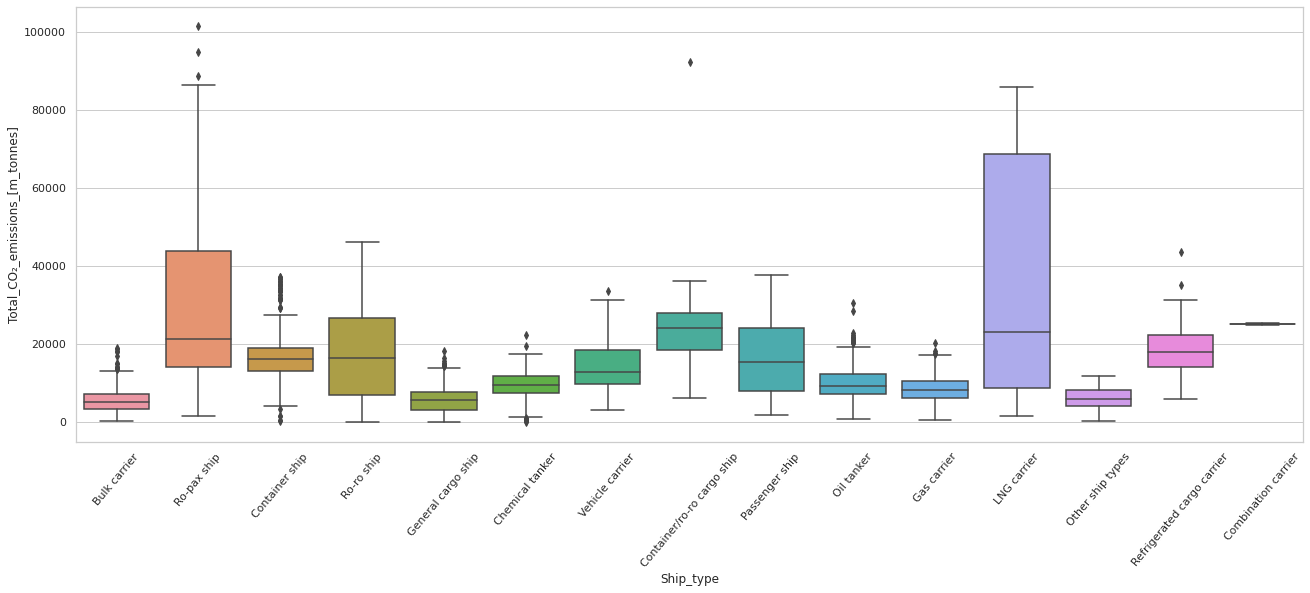

In [173]:
plt.figure(figsize= (22, 8))
sns.set_style("whitegrid")
ax =sns.boxplot(x = 'Ship_type', y = 'Total_CO₂_emissions_[m_tonnes]', data = df)

ax.tick_params(axis='x', rotation=50)


In [174]:
print(df.columns.tolist())

['IMO_Number', 'Name', 'Ship_type', 'Reporting_Period', 'Technical_efficiency', '[gCO₂/t·nm]', 'Ice_Class', 'Verifier_Country', 'Total_fuel_consumption_[m_tonnes]', 'Total_CO₂_emissions_[m_tonnes]', 'Annual_Total_time_spent_at_sea_[hours]', 'Annual_average_Fuel_consumption_per_distance_[kg_/_n_mile]', 'Total_time_spent_at_sea_through_ice_[hours]']


<AxesSubplot:title={'center':'Total Time Spend at Sea Vs C02 Emission w.r.t. Ship Type '}, xlabel='Annual_Total_time_spent_at_sea_[hours]', ylabel='Total_CO₂_emissions_[m_tonnes]'>

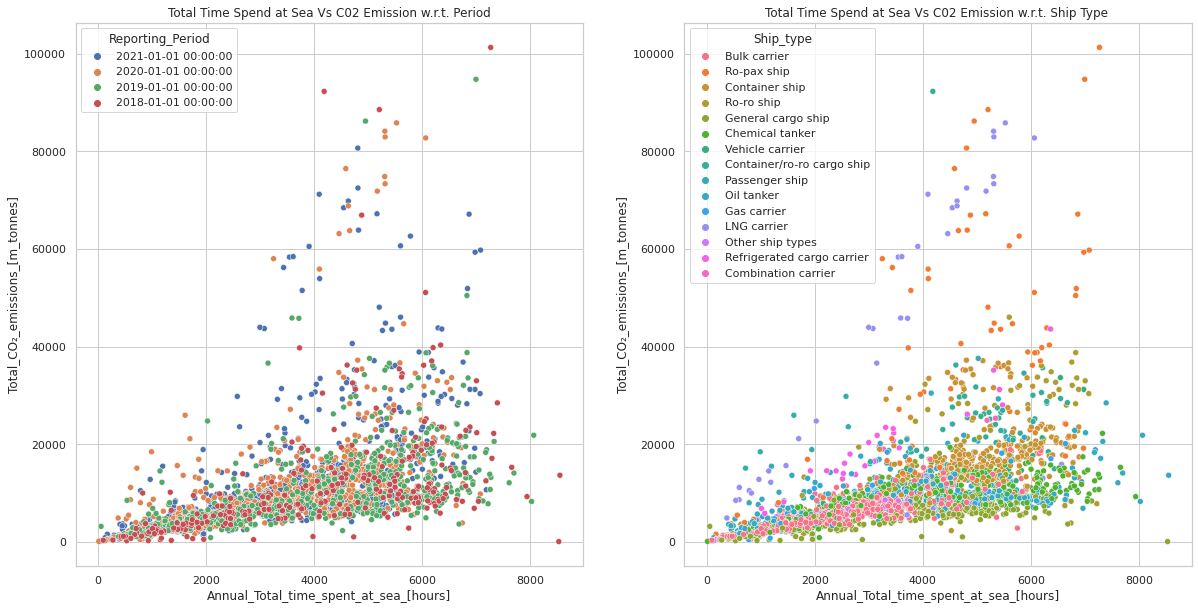

In [175]:
# plt.figure(figsize= (22, 8))
# sns.scatterplot(x = 'Annual_Total_time_spent_at_sea_[hours]', y = 'Total_CO₂_emissions_[m_tonnes]', data = df, hue = 'Ship_type')

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.set_title('Total Time Spend at Sea Vs C02 Emission w.r.t. Period')
sns.scatterplot(x = 'Annual_Total_time_spent_at_sea_[hours]', y = 'Total_CO₂_emissions_[m_tonnes]', data = df, hue = 'Reporting_Period', ax=ax1)

ax2.set_title('Total Time Spend at Sea Vs C02 Emission w.r.t. Ship Type ')
sns.scatterplot(x = 'Annual_Total_time_spent_at_sea_[hours]', y = 'Total_CO₂_emissions_[m_tonnes]', data = df, hue = 'Ship_type', ax=ax2)



<AxesSubplot:title={'center':'Total Time Spend at sea (Ice) Vs C02 Emission w.r.t. Ship Type '}, xlabel='Total_time_spent_at_sea_through_ice_[hours]', ylabel='Total_CO₂_emissions_[m_tonnes]'>

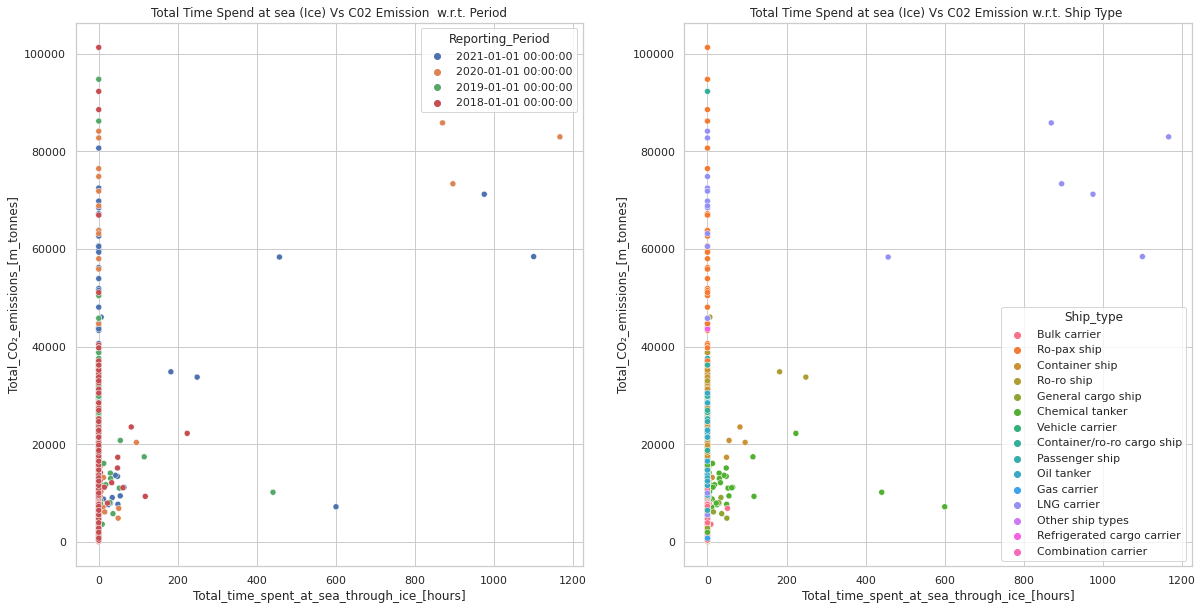

In [176]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.set_title('Total Time Spend at sea (Ice) Vs C02 Emission  w.r.t. Period')
sns.scatterplot(x = 'Total_time_spent_at_sea_through_ice_[hours]' , y = 'Total_CO₂_emissions_[m_tonnes]', data = df, hue = 'Reporting_Period', ax=ax1)

ax2.set_title('Total Time Spend at sea (Ice) Vs C02 Emission w.r.t. Ship Type ')
sns.scatterplot(x = 'Total_time_spent_at_sea_through_ice_[hours]', y = 'Total_CO₂_emissions_[m_tonnes]', data = df, hue = 'Ship_type', ax=ax2)

In [177]:
# updated_df = mc.MoveToLast(updated_df,'Ship_type')
# updated_df

In [178]:
# # Import train_test_split function
# from sklearn.model_selection import train_test_split

# X = updated_df.iloc[:, :-1]
# y = updated_df.iloc[:, -1]
 
# # split the dataset
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.25, random_state=0)

In [179]:

# # importing random forest classifier from assemble module
# from sklearn.ensemble import RandomForestClassifier

# # creating a RF classifier
# clf = RandomForestClassifier(n_estimators = 150) 
 
# # Training the model on the training dataset
# # fit function is used to train the model using the training sets as parameters

# clf.fit(X_train, y_train)
 
# # performing predictions on the test dataset
# y_pred = clf.predict(X_test)
 
# # metrics are used to find accuracy or error
# from sklearn import metrics 
# print()
 
# # using metrics module for accuracy calculation
# print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

In [180]:
# pd.Series(clf.feature_importances_,
# 		index = X.columns).sort_values(ascending = False).plot(kind = 'bar',
# 																figsize = (14,6));
